Step 1: Importing Libraries and Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("c:\\Users\\hoan\\Downloads\\HousePricePrediction.csv")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


- Id: To count the records.
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotArea: Lot size in square feet.
- LotConfig: Configuration of the lot.
- BldgType: Type of dwelling.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction year.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- Exterior1st: Exterior covering on house.
- BsmtFinSF2: Type 2 finished square feet.
- TotalBsmtSF: Total square feet of basement area.
- SalePrice: To be predicted.

In [5]:
dataset.shape


(2919, 13)

- The dataset contains 2,919 rows and 13 columns.

- This means there are 2,919 records (observations) and 13 features (variables) in the dataset.

Step 2: Data Preprocessing

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


- The dataset includes 4 categorical variables and 3 float variables.

- There are no integer variables present.

Step 3: Exploratory Data Analysis

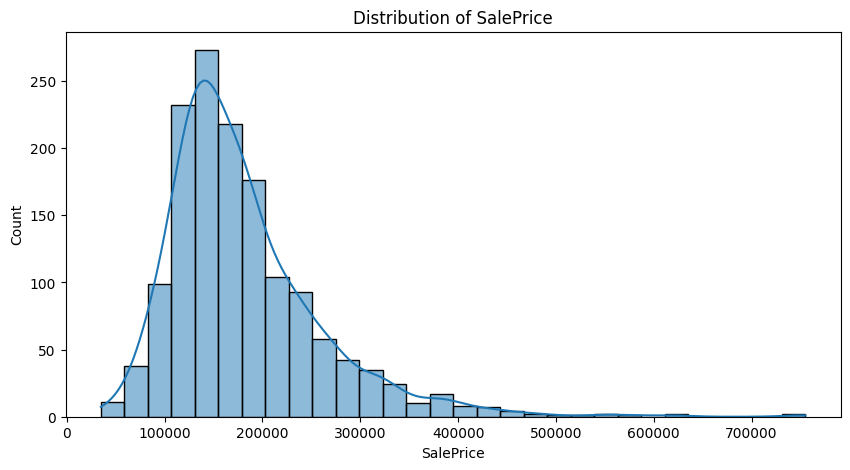

In [7]:
# Q1. Distribution of SalePrice
plt.figure(figsize=(10,5))
sns.histplot(dataset['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.show()

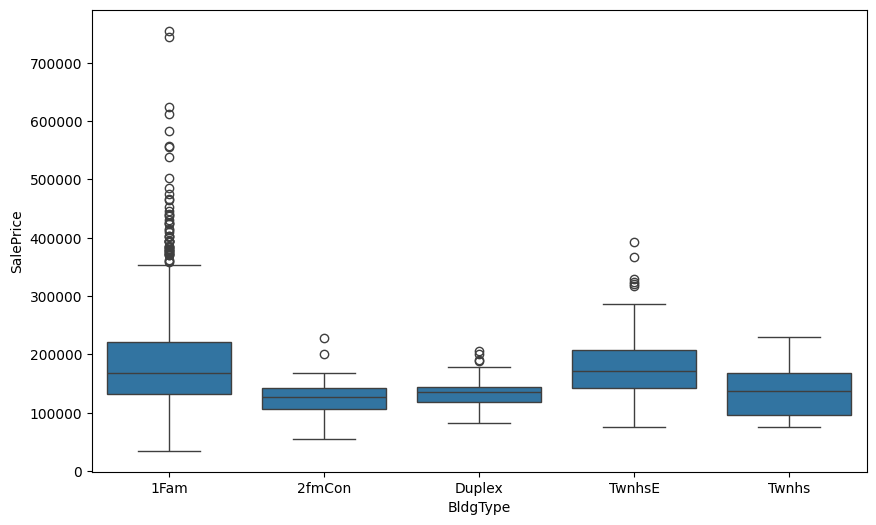

In [8]:
# Q2. SalePrice by BldgType
plt.figure(figsize=(10,6))
sns.boxplot(x='BldgType', y='SalePrice', data=dataset)
plt.show()

In [9]:
# Q3. Correlation with SalePrice
# Exclude ID column and select only numeric columns
numerical_dataset = dataset.select_dtypes(include=['number'])
# Explicitly exclude ID columns if they exist
id_cols = ['Id', 'id', 'ID', 'Id']
numerical_dataset = numerical_dataset.drop(columns=[c for c in id_cols if c in numerical_dataset.columns], errors='ignore')
corr = numerical_dataset.corr()['SalePrice'].sort_values(ascending=False)
print("Top correlated features with SalePrice:\n", corr.head(10))

Top correlated features with SalePrice:
 SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


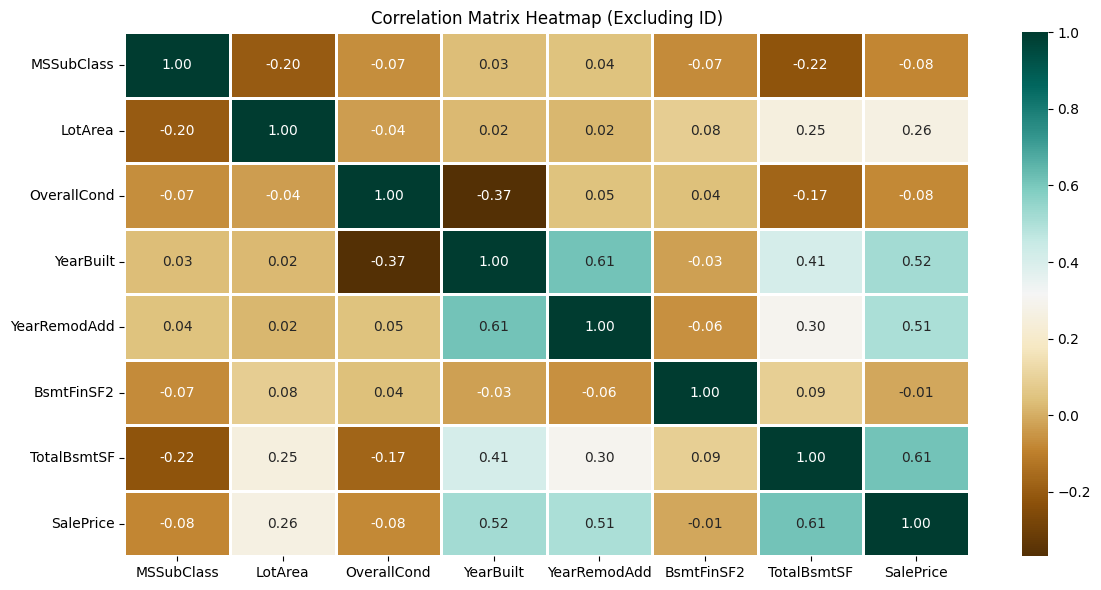

In [10]:
# Correlation heatmap - exclude ID columns
numerical_dataset = dataset.select_dtypes(include=['number'])
# Explicitly exclude ID columns
id_cols = ['Id', 'id', 'ID', 'Id']
numerical_dataset = numerical_dataset.drop(columns=[c for c in id_cols if c in numerical_dataset.columns], errors='ignore')

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.title('Correlation Matrix Heatmap (Excluding ID)')
plt.tight_layout()
plt.show()

📊 Correlation Analysis Summary
🔹 Strong Positive Correlations with SalePrice
- TotalBsmtSF (0.61): This is the most strongly correlated variable with SalePrice. Larger basement size is associated with higher prices.

- YearBuilt (0.52): Newer houses tend to sell for more.

- YearRemodAdd (0.51): Homes that were recently remodeled also tend to have higher prices.

🔸 Moderate Positive Correlation
- LotArea (0.26): Larger lot size slightly increases the sale price, but the effect is moderate.

⚠️ Weak or No Correlation
- BsmtFinSF2 (-0.01): Almost no correlation with SalePrice, suggesting that type 2 finished basement area doesn’t significantly impact the sale price.

- MSSubClass (-0.08): Weak negative correlation. The class/type of dwelling slightly affects price but not strongly.

- OverallCond (-0.08): Surprisingly low correlation — might indicate that condition as measured here doesn’t align well with market value.

- Id (-0.02): As expected, the ID has no correlation with sale price.

🔍 Other Noteworthy Relationships
- YearBuilt and YearRemodAdd: Strongly correlated (0.61) — newer homes tend to also have recent renovations.

- TotalBsmtSF and YearBuilt (0.41) — newer homes may have larger basements.

✅ Insights for Modeling
- Consider including: TotalBsmtSF, YearBuilt, YearRemodAdd, and LotArea as predictors.

- Consider excluding: Id, BsmtFinSF2, and possibly OverallCond, unless further feature engineering is applied.

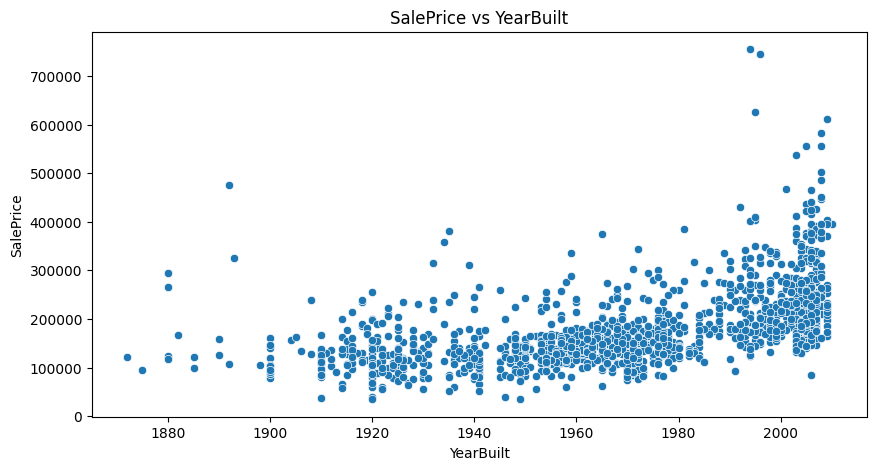

In [38]:
# Q4. SalePrice vs YearBuilt
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=dataset)
plt.title("SalePrice vs YearBuilt")
plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

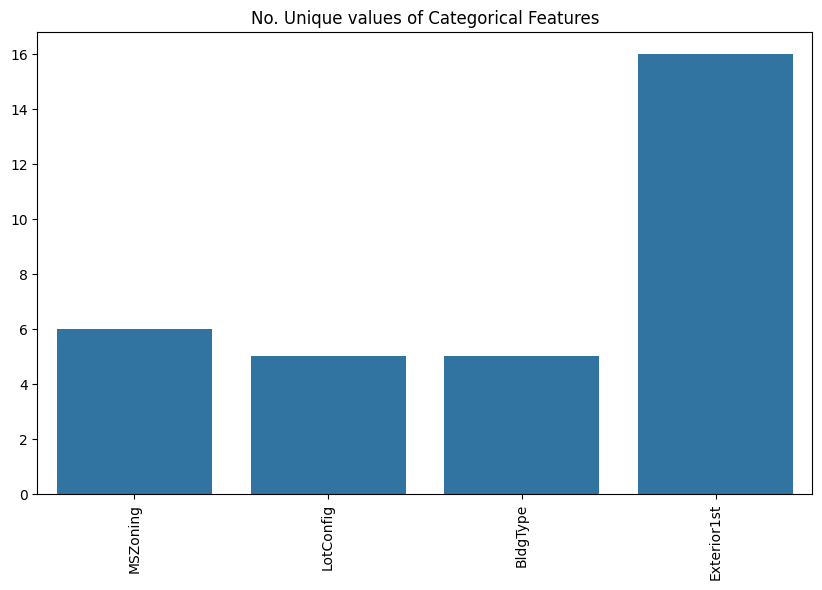

In [39]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

🧩 Analysis of Categorical Feature Cardinality
- The chart illustrates how many unique categories exist for each categorical variable in the dataset:

Feature	Unique Values
MSZoning	6
LotConfig	5
BldgType	5
Exterior1st	16

🔹 Key Observations:
- Exterior1st has the highest cardinality (16 unique values), suggesting it might introduce complexity for encoding (e.g., one-hot encoding may result in many columns).

- MSZoning, LotConfig, and BldgType have relatively low cardinality (5–6 categories), making them easier to encode and suitable for use in many models.

- These variables may capture important aspects of location, layout, and dwelling type, which could impact house pricing.

✅ Modeling Implications:
- Low-cardinality features like MSZoning, LotConfig, and BldgType are ideal for simple encoding.

- High-cardinality feature like Exterior1st may require:

- Grouping less frequent categories,

- Or using advanced encoding (e.g., target encoding or embedding techniques) to reduce dimensionality.

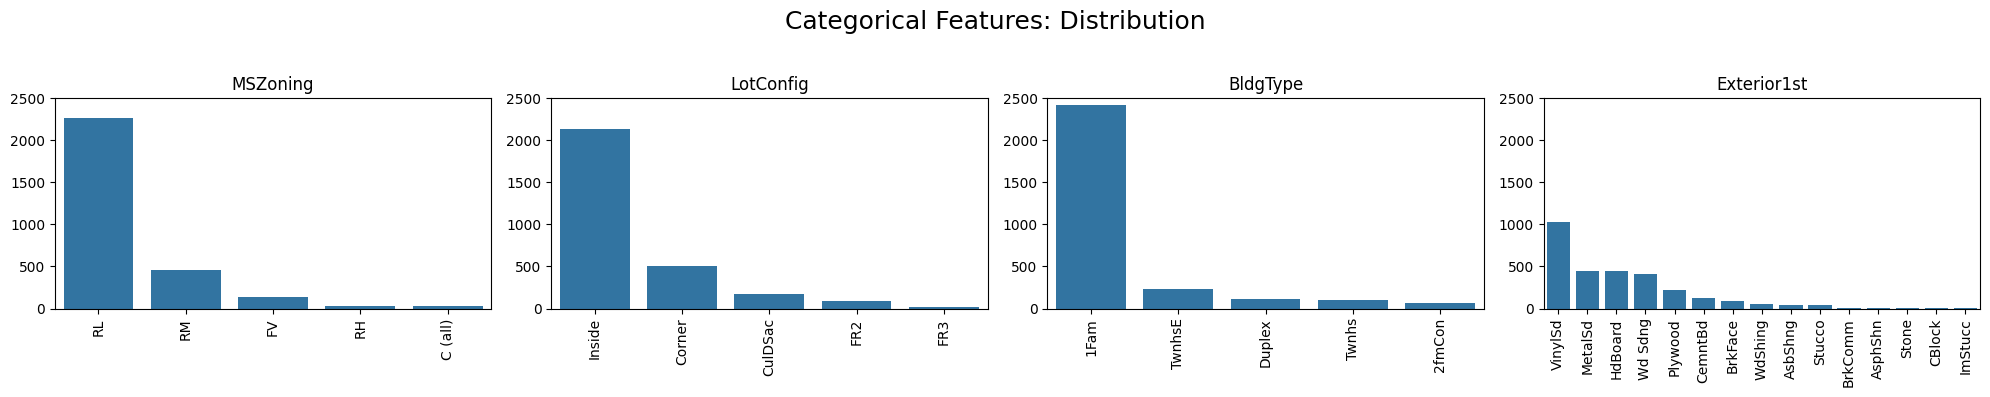

In [40]:
n_cols = 4
n_rows = (len(object_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
fig.suptitle('Categorical Features: Distribution', fontsize=18)
axes = axes.flatten()

for index, col in enumerate(object_cols):
    y = dataset[col].value_counts()
    sns.barplot(x=y.index, y=y.values, ax=axes[index])
    axes[index].set_title(col)
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    axes[index].set_ylim(0, 2500)  
    axes[index].set_xticks(range(len(y.index)))
    axes[index].set_xticklabels(y.index)

# Hide any unused subplots
for i in range(index + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Step 4: Data Cleaning

In [41]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

This line of code removes the Id column from the dataset DataFrame. Here's what each part does:

- dataset.drop(...): Calls the drop() method on the DataFrame named dataset.

- ['Id']: Specifies the column named Id to be dropped (provided as a list).

- axis=1: Indicates that we're dropping a column (use axis=0 to drop rows).

- inplace=True: Makes the change directly to dataset without needing to assign it to a new variable.

Summary:
- This code deletes the Id column permanently from the DataFrame dataset.

In [42]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 

This line fills any missing values in the SalePrice column with the column's mean value:

- .fillna(...): Replaces NaN (missing) values.

- dataset['SalePrice'].mean(): Calculates the average (mean) of the non-missing values in the column.

- The result is assigned back to dataset['SalePrice'], updating the column.

Summary:
- This code replaces all missing values in the SalePrice column with the column’s average value to ensure no nulls remain.

In [43]:
new_dataset = dataset.dropna()

- dataset.dropna(): Returns a new DataFrame with all rows containing any missing (NaN) values removed.

- new_dataset = ...: Stores the result in a new DataFrame called new_dataset.

Summary:
- This code removes all rows from dataset that have at least one missing value and saves the cleaned data into new_dataset.

In [44]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

- new_dataset.isnull(): Returns a DataFrame of the same shape as new_dataset, with True where values are missing (NaN) and False otherwise.

- .sum(): Adds up the number of True values (i.e. missing values) for each column.

Summary:
- This code shows how many missing values remain in each column of new_dataset. It helps verify that missing data has been handled.

Step 5: OneHotEncoder - For Label categorical features

In [45]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


This code identifies and lists all categorical columns in new_dataset, which are useful for encoding before feeding into machine learning models. In this case, there are 4 categorical features.

In [46]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [ ]:
# ========================================
# Correlation Heatmap with Encoded Qualitative Fields
# ========================================
# Create correlation matrix including encoded categorical features
# Exclude ID columns if they exist
id_cols_to_exclude = ['Id', 'id', 'ID', 'Id']
cols_to_exclude = [c for c in id_cols_to_exclude if c in df_final.columns]
df_final_for_corr = df_final.drop(columns=cols_to_exclude, errors='ignore')

# Create correlation heatmap with all features (numeric + encoded categorical)
plt.figure(figsize=(16, 12))
correlation_matrix = df_final_for_corr.corr()

# Show correlation with SalePrice
sale_price_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Top correlated features with SalePrice (including encoded categorical):")
print(sale_price_corr.head(15))
print()

# Create heatmap (show top correlations for readability)
# Select top features by correlation with SalePrice for better visualization
top_features = sale_price_corr.abs().head(20).index.tolist()
if 'SalePrice' not in top_features:
    top_features.append('SalePrice')

correlation_subset = correlation_matrix.loc[top_features, top_features]

sns.heatmap(correlation_subset,
            cmap='BrBG',
            fmt='.2f',
            linewidths=1,
            annot=True,
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap (Including Encoded Categorical Features)')
plt.tight_layout()
plt.show()


This code replaces the original categorical columns in new_dataset with their one-hot encoded versions and produces a fully numerical DataFrame df_final, ready for machine learning models.

Step 6: Splitting Dataset into Training and Testing

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

Step 7: Model Training and Accuracy

1. SVM - Support vector Machine

In [48]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


Output: 0.1871
→ On average, the model's predictions are 18.71% off from the actual house prices.

2. Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.19357520366351813

Output: 0.1935
→ On average, the model’s predictions are 19.35% off from the actual sale prices.

3. Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.187416838415999


Output: 0.1874
→ On average, the model's predictions are 18.74% off from the actual sale prices.

In [51]:
# Average House Price
mean_price = dataset['SalePrice'].mean()
print(f"Average house price: {mean_price:,.0f}")

# Minimum and Maximum House Prices
min_price = dataset['SalePrice'].min()
max_price = dataset['SalePrice'].max()
print(f"Lowest house price: {min_price:,.0f}")
print(f"Highest house price: {max_price:,.0f}")

# Skewness and Kurtosis of the House Price Distribution
skewness = dataset['SalePrice'].skew()
kurtosis = dataset['SalePrice'].kurtosis()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Most Common Number of Bedrooms and Bathrooms (if such columns exist)
bedroom_col = [col for col in dataset.columns if 'bed' in col.lower()]
bathroom_col = [col for col in dataset.columns if 'bath' in col.lower()]

if bedroom_col:
    most_common_bedroom = dataset[bedroom_col[0]].mode()[0]
    print(f"Most common number of bedrooms: {most_common_bedroom}")
else:
    print("Dataset does not contain a bedroom column.")

if bathroom_col:
    most_common_bathroom = dataset[bathroom_col[0]].mode()[0]
    print(f"Most common number of bathrooms: {most_common_bathroom}")
else:
    print("Dataset does not contain a bathroom column.")

# Area with the Most Houses Listed (assuming 'MSZoning' represents area/zone)
most_common_area = dataset['MSZoning'].mode()[0]
area_count = dataset['MSZoning'].value_counts()[most_common_area]
print(f"Area with the most houses listed: {most_common_area} ({area_count} listings)")


Average house price: 180,921
Lowest house price: 34,900
Highest house price: 755,000
Skewness: 2.66
Kurtosis: 16.04
Dataset does not contain a bedroom column.
Dataset does not contain a bathroom column.
Area with the most houses listed: RL (2265 listings)


Dataset does not contain a bedroom column.

Average house price: Central vs Suburban
Central: 163065.11507481558
Suburban: 186036.42397773443


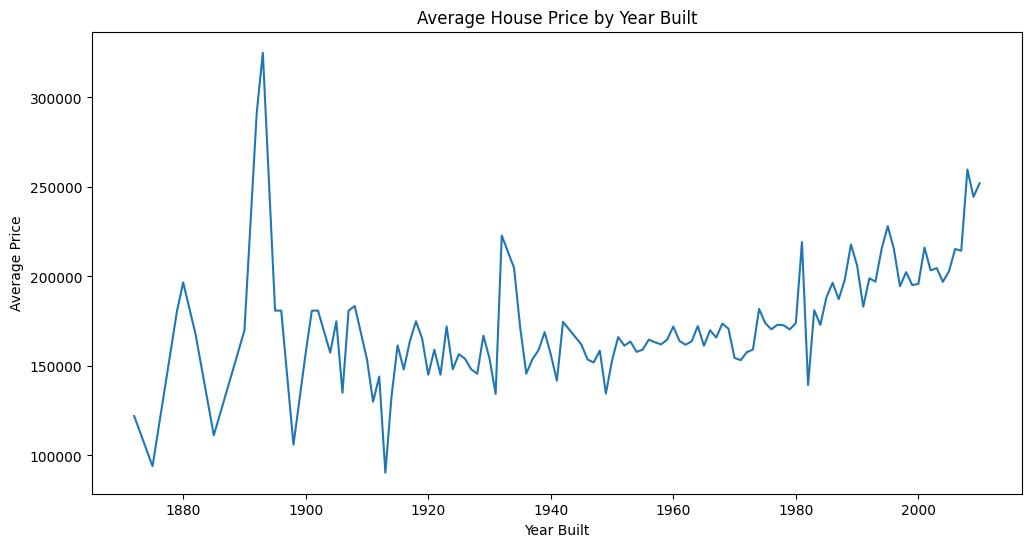

Dataset does not contain a garage column.


In [52]:
# Question 1: Compare House Prices by Number of Bedrooms (if a bedroom column exists)
if bedroom_col:
    # Assume the bedroom column is bedroom_col[0]
    col_bed = bedroom_col[0]
    # Create groups: 1–2 bedrooms, 3–4 bedrooms, 5+ bedrooms
    bins = [0, 2, 4, dataset[col_bed].max()]
    labels = ['1–2 bedrooms', '3–4 bedrooms', '5+ bedrooms']
    dataset['bed_group'] = pd.cut(dataset[col_bed], bins=bins, labels=labels, right=True)
    avg_price_bed = dataset.groupby('bed_group')['SalePrice'].mean()
    print("Average house price by bedroom group:")
    print(avg_price_bed)
else:
    print("Dataset does not contain a bedroom column.")

# Question 2: Compare Central vs Suburban House Prices (using MSZoning)
# RL is typically suburban; others (FV, RM, RH, C) are considered central
central_zones = ['FV', 'RM', 'RH', 'C (all)']
dataset['is_central'] = dataset['MSZoning'].isin(central_zones)
avg_price_central = dataset.groupby('is_central')['SalePrice'].mean()
print("\nAverage house price: Central vs Suburban")
print("Central:", avg_price_central[True])
print("Suburban:", avg_price_central[False])

# Question 3: Average House Price by Year Built
avg_price_year = dataset.groupby('YearBuilt')['SalePrice'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values)
plt.title("Average House Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.show()

# Question 4: Compare House Prices with and without Garage (if a garage column exists)
garage_col = [col for col in dataset.columns if 'garage' in col.lower()]
if garage_col:
    col_garage = garage_col[0]
    # Assume 0 indicates no garage
    dataset['has_garage'] = dataset[col_garage] > 0
    avg_price_garage = dataset.groupby('has_garage')['SalePrice'].mean()
    print("\nAverage house price: With vs Without Garage")
    print("With garage:", avg_price_garage[True])
    print("Without garage:", avg_price_garage[False])
else:
    print("Dataset does not contain a garage column.")


# Average House Price by Year Built

## Overview
The chart above shows the **average house price** grouped by **year built**.  
- **X-axis (Year Built):** the construction year of houses.  
- **Y-axis (Average Price):** average selling price (in monetary units).  

---

## Key Observations
- **1870–1900:** House prices fluctuated strongly, with noticeable spikes (e.g., around 1890).  
- **1900–1950:** Prices were relatively stable, staying around 150,000–200,000.  
- **Post-1950:** A **gradual upward trend** emerges, though with short-term fluctuations.  
- **1980 onwards:** Strong price growth, especially between 2000–2010, reaching peaks of ~250,000–300,000.

---

## Interpretation
- The large swings in the late 19th century may reflect **economic and historical factors** (e.g., financial crises, real estate bubbles).  
- The relative stability between 1920–1950 likely reflects **slower growth periods**, influenced by global wars and economic downturns.  
- After 1980, the consistent price increase can be attributed to:
  - Urbanization and higher housing demand.  
  - Inflation and rising construction costs.  
  - Stronger development of the real estate market.  

---

## Next Steps
- Compare house prices by **geographic region** (urban vs rural).  
- Adjust prices for **inflation** to reflect real purchasing power.  
- Analyze the influence of additional factors (house size, number of rooms, amenities).  

---


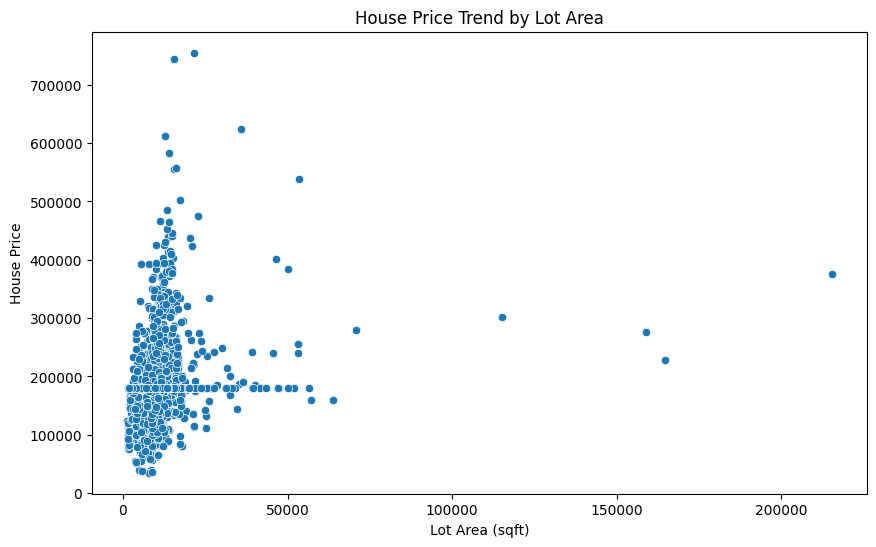

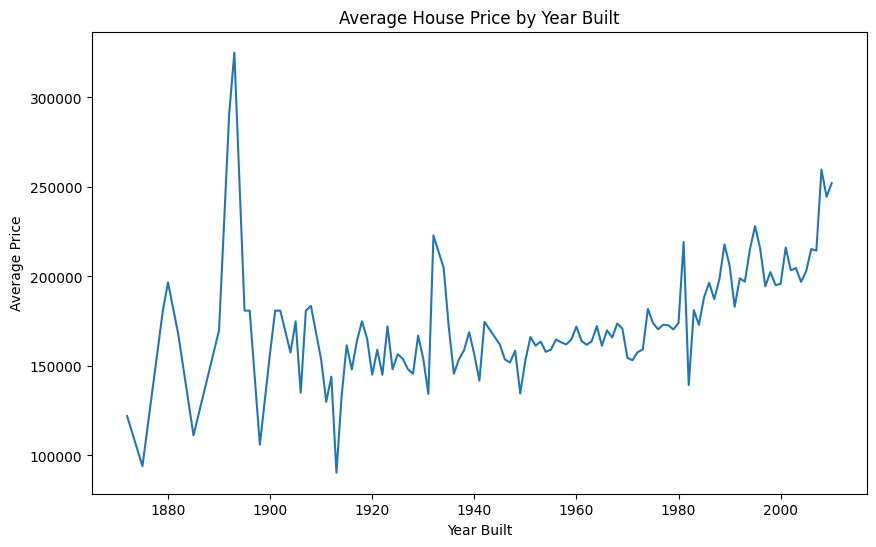

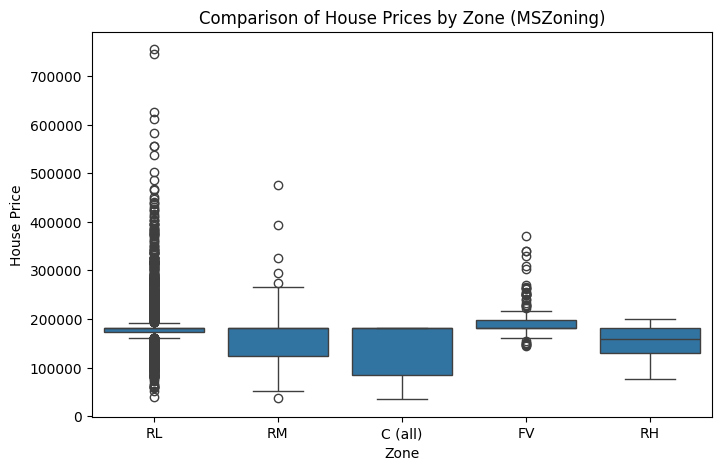

In [53]:
# 1. Does House Price Tend to Increase with Lot Area?
plt.figure(figsize=(10,6))
sns.scatterplot(x='LotArea', y='SalePrice', data=dataset)
plt.title("House Price Trend by Lot Area")
plt.xlabel("Lot Area (sqft)")
plt.ylabel("House Price")
plt.show()

# 2. Are Recently Built Houses More Expensive?
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values)
plt.title("Average House Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.show()

# 3. Do House Prices Vary Significantly Across Different Zones (MSZoning)?
plt.figure(figsize=(8,5))
sns.boxplot(x='MSZoning', y='SalePrice', data=dataset)
plt.title("Comparison of House Prices by Zone (MSZoning)")
plt.xlabel("Zone")
plt.ylabel("House Price")
plt.show()


# House Price Analysis by Lot Area and Zoning

## 1. Relationship Between Lot Area and House Price
- The scatter plot shows the relationship between **Lot Area (sqft)** and **House Price**.  
- Most houses are concentrated below **20,000 sqft** with prices between **$100,000–$300,000**.  
- A few **outliers** exist with very large lot areas (>100,000 sqft), but these do not always correspond to the highest prices.  
📊 *Conclusion: Lot area has some influence on price, but beyond a certain point the relationship weakens (not strictly linear).*

---

## 2. Comparison of House Prices by Zoning (MSZoning)
- The boxplot compares house prices across zoning categories:
  - **RL (Residential Low Density):** Most common, median price around ~$180,000 with many outliers (some >$700,000).  
  - **RM (Residential Medium Density):** Slightly lower median than RL, narrower price distribution.  
  - **C (Commercial):** Relatively lower prices on average.  
  - **FV (Floating Village Residential):** Higher median, with some outliers.  
  - **RH (Residential High Density):** Smaller sample, but generally lower than FV/RL.  
- Variability is highest in **RL and FV**, suggesting more diverse property sizes and qualities.  

📈 *Conclusion: Zoning strongly influences house prices, with RL and FV being the more valuable zones compared to RM, C, and RH.*

---

## Insights
- **Lot Area:** Larger lot size does not guarantee higher price — location and zoning matter more.  
- **Zoning:** One of the strongest predictors of house value, with RL and FV zones commanding higher prices.  

---

## Next Steps
- Perform **multivariate regression** including LotArea, Zoning, and other features (rooms, year built, quality).  
- Identify and handle **outliers** to improve model accuracy.  
- Explore **interaction effects** (e.g., large lot + premium zoning vs large lot + commercial zoning).  


Variable most strongly correlated with house price: TotalBsmtSF (0.61)

Average house price by location:
Central: 163,065
Suburban: 186,036


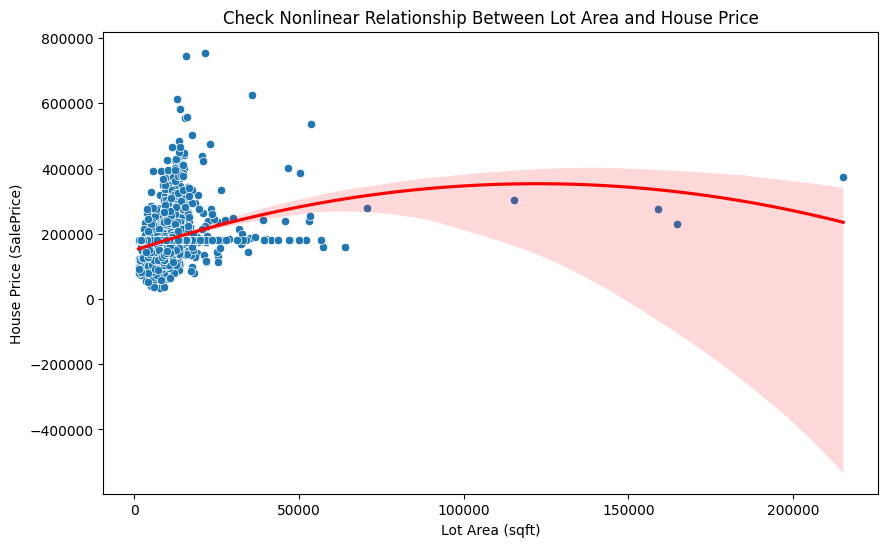

In [54]:
# 1. Which Variable Has the Strongest Correlation with House Price?
# Using the correlation matrix stored in 'corr'
top_corr_feature = corr[1:].idxmax()  # Exclude SalePrice self-correlation
top_corr_value = corr[top_corr_feature]
print(f"Variable most strongly correlated with house price: {top_corr_feature} ({top_corr_value:.2f})")

# 2. Is House Price Related to Distance from the City Center?
# The dataset does not include a distance-to-center column, but we can use 'is_central' (whether the house is central or not)
if 'is_central' in dataset.columns:
    avg_price_central = dataset.groupby('is_central')['SalePrice'].mean()
    print("\nAverage house price by location:")
    print(f"Central: {avg_price_central[True]:,.0f}")
    print(f"Suburban: {avg_price_central[False]:,.0f}")
else:
    print("\nThe dataset does not contain information on distance from the city center.")

# 3. Check Nonlinear Relationship Between Lot Area and House Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='LotArea', y='SalePrice', data=dataset)
sns.regplot(x='LotArea', y='SalePrice', data=dataset, scatter=False, color='red', order=2)
plt.title("Check Nonlinear Relationship Between Lot Area and House Price")
plt.xlabel("Lot Area (sqft)")
plt.ylabel("House Price (SalePrice)")
plt.show()


# Nonlinear Relationship Between Lot Area and House Price

## Overview
The scatter plot examines the relationship between **Lot Area (sqft)** and **Sale Price** of houses, fitted with a **nonlinear regression curve**.

- **Blue dots:** Actual data points (houses).  
- **Red curve:** Polynomial regression fit.  
- **Shaded region:** Confidence interval around the fitted curve.  

---

## Key Observations
- For **smaller lot sizes (<20,000 sqft):** Prices increase as lot area increases, showing a positive relationship.  
- For **medium to large lot sizes (20,000–100,000 sqft):** The trend continues upward, but the slope flattens.  
- For **very large lot sizes (>100,000 sqft):** The regression curve bends downward, suggesting diminishing returns — additional land does not translate into proportional price increases.  

---

## Interpretation
- The relationship between **Lot Area and Sale Price is not strictly linear**.  
- At smaller scales, more land tends to increase property value.  
- Beyond a certain threshold, **location, zoning, and house quality** become more important than sheer lot size.  
- Outliers with extremely large lot sizes can distort the linear relationship, which is why a **nonlinear model** fits better.

---

## Next Steps
- Use **log transformation of Lot Area** to stabilize the variance and reduce the effect of extreme outliers.  
- Build a **multiple regression model** including both Lot Area and categorical factors (e.g., MSZoning, Neighborhood).  
- Consider interaction terms: large lot size may have a bigger impact in premium zones than in low-value zones.  

---


## Model Comparison with Cross-Validation and Comprehensive Metrics


In [ ]:
# ========================================
# Comprehensive Model Comparison
# Using Cross-Validation with RMSE, MAE, and R²
# ========================================

from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store all models and their results
models_comparison = {}

print("=" * 70)
print("MODEL COMPARISON WITH CROSS-VALIDATION")
print("=" * 70)
print()

# ========================================
# 1. Linear Regression with Cross-Validation
# ========================================
print("1. Linear Regression:")
print("-" * 70)

# Cross-validation scores
cv_r2_lr = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring='r2')
cv_rmse_lr = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_mae_lr = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')

# Test set predictions (already done)
test_r2_lr = r2_score(Y_valid, Y_pred_lr)
test_rmse_lr = np.sqrt(mean_squared_error(Y_valid, Y_pred_lr))
test_mae_lr = mean_absolute_error(Y_valid, Y_pred_lr)

models_comparison['Linear Regression'] = {
    'model': model_LR,
    'cv_r2_mean': cv_r2_lr.mean(),
    'cv_r2_std': cv_r2_lr.std(),
    'cv_rmse_mean': -cv_rmse_lr.mean(),
    'cv_rmse_std': cv_rmse_lr.std(),
    'cv_mae_mean': -cv_mae_lr.mean(),
    'cv_mae_std': cv_mae_lr.std(),
    'test_r2': test_r2_lr,
    'test_rmse': test_rmse_lr,
    'test_mae': test_mae_lr
}

print(f"  CV R²:     {cv_r2_lr.mean():.4f} (+/- {cv_r2_lr.std() * 2:.4f})")
print(f"  CV RMSE:   {-cv_rmse_lr.mean():,.0f} (+/- {cv_rmse_lr.std() * 2:,.0f})")
print(f"  CV MAE:    {-cv_mae_lr.mean():,.0f} (+/- {cv_mae_lr.std() * 2:,.0f})")
print(f"  Test R²:   {test_r2_lr:.4f}")
print(f"  Test RMSE: {test_rmse_lr:,.0f}")
print(f"  Test MAE:  {test_mae_lr:,.0f}")
print()

# ========================================
# 2. Random Forest with Cross-Validation
# ========================================
print("2. Random Forest:")
print("-" * 70)

# Cross-validation scores
cv_r2_rf = cross_val_score(model_RFR, X_train, Y_train, cv=kfold, scoring='r2')
cv_rmse_rf = cross_val_score(model_RFR, X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_mae_rf = cross_val_score(model_RFR, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')

# Test set predictions
test_r2_rf = r2_score(Y_valid, Y_pred_rfr)
test_rmse_rf = np.sqrt(mean_squared_error(Y_valid, Y_pred_rfr))
test_mae_rf = mean_absolute_error(Y_valid, Y_pred_rfr)

models_comparison['Random Forest'] = {
    'model': model_RFR,
    'cv_r2_mean': cv_r2_rf.mean(),
    'cv_r2_std': cv_r2_rf.std(),
    'cv_rmse_mean': -cv_rmse_rf.mean(),
    'cv_rmse_std': cv_rmse_rf.std(),
    'cv_mae_mean': -cv_mae_rf.mean(),
    'cv_mae_std': cv_mae_rf.std(),
    'test_r2': test_r2_rf,
    'test_rmse': test_rmse_rf,
    'test_mae': test_mae_rf
}

print(f"  CV R²:     {cv_r2_rf.mean():.4f} (+/- {cv_r2_rf.std() * 2:.4f})")
print(f"  CV RMSE:   {-cv_rmse_rf.mean():,.0f} (+/- {cv_rmse_rf.std() * 2:,.0f})")
print(f"  CV MAE:    {-cv_mae_rf.mean():,.0f} (+/- {cv_mae_rf.std() * 2:,.0f})")
print(f"  Test R²:   {test_r2_rf:.4f}")
print(f"  Test RMSE: {test_rmse_rf:,.0f}")
print(f"  Test MAE:  {test_mae_rf:,.0f}")
print()

# ========================================
# 3. Gradient Boosting with Cross-Validation
# ========================================
print("3. Gradient Boosting:")
print("-" * 70)

# Cross-validation scores
cv_r2_gb = cross_val_score(model_GBR, X_train, Y_train, cv=kfold, scoring='r2')
cv_rmse_gb = cross_val_score(model_GBR, X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_mae_gb = cross_val_score(model_GBR, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')

# Test set predictions
test_r2_gb = r2_score(Y_valid, Y_pred_gbr)
test_rmse_gb = np.sqrt(mean_squared_error(Y_valid, Y_pred_gbr))
test_mae_gb = mean_absolute_error(Y_valid, Y_pred_gbr)

models_comparison['Gradient Boosting'] = {
    'model': model_GBR,
    'cv_r2_mean': cv_r2_gb.mean(),
    'cv_r2_std': cv_r2_gb.std(),
    'cv_rmse_mean': -cv_rmse_gb.mean(),
    'cv_rmse_std': cv_rmse_gb.std(),
    'cv_mae_mean': -cv_mae_gb.mean(),
    'cv_mae_std': cv_mae_gb.std(),
    'test_r2': test_r2_gb,
    'test_rmse': test_rmse_gb,
    'test_mae': test_mae_gb
}

print(f"  CV R²:     {cv_r2_gb.mean():.4f} (+/- {cv_r2_gb.std() * 2:.4f})")
print(f"  CV RMSE:   {-cv_rmse_gb.mean():,.0f} (+/- {cv_rmse_gb.std() * 2:,.0f})")
print(f"  CV MAE:    {-cv_mae_gb.mean():,.0f} (+/- {cv_mae_gb.std() * 2:,.0f})")
print(f"  Test R²:   {test_r2_gb:.4f}")
print(f"  Test RMSE: {test_rmse_gb:,.0f}")
print(f"  Test MAE:  {test_mae_gb:,.0f}")
print()

# ========================================
# 4. Neural Network with Cross-Validation
# ========================================
print("4. Neural Network:")
print("-" * 70)

# Cross-validation scores
cv_r2_nn = cross_val_score(model_NN, X_train, Y_train, cv=kfold, scoring='r2')
cv_rmse_nn = cross_val_score(model_NN, X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_mae_nn = cross_val_score(model_NN, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')

# Test set predictions
test_r2_nn = r2_score(Y_valid, Y_pred_nn)
test_rmse_nn = np.sqrt(mean_squared_error(Y_valid, Y_pred_nn))
test_mae_nn = mean_absolute_error(Y_valid, Y_pred_nn)

models_comparison['Neural Network'] = {
    'model': model_NN,
    'cv_r2_mean': cv_r2_nn.mean(),
    'cv_r2_std': cv_r2_nn.std(),
    'cv_rmse_mean': -cv_rmse_nn.mean(),
    'cv_rmse_std': cv_rmse_nn.std(),
    'cv_mae_mean': -cv_mae_nn.mean(),
    'cv_mae_std': cv_mae_nn.std(),
    'test_r2': test_r2_nn,
    'test_rmse': test_rmse_nn,
    'test_mae': test_mae_nn
}

print(f"  CV R²:     {cv_r2_nn.mean():.4f} (+/- {cv_r2_nn.std() * 2:.4f})")
print(f"  CV RMSE:   {-cv_rmse_nn.mean():,.0f} (+/- {cv_rmse_nn.std() * 2:,.0f})")
print(f"  CV MAE:    {-cv_mae_nn.mean():,.0f} (+/- {cv_mae_nn.std() * 2:,.0f})")
print(f"  Test R²:   {test_r2_nn:.4f}")
print(f"  Test RMSE: {test_rmse_nn:,.0f}")
print(f"  Test MAE:  {test_mae_nn:,.0f}")
print()

# ========================================
# Summary Comparison Table
# ========================================
print("=" * 70)
print("SUMMARY COMPARISON TABLE")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Model': list(models_comparison.keys()),
    'CV R² (mean)': [models_comparison[m]['cv_r2_mean'] for m in models_comparison.keys()],
    'CV RMSE (mean)': [models_comparison[m]['cv_rmse_mean'] for m in models_comparison.keys()],
    'CV MAE (mean)': [models_comparison[m]['cv_mae_mean'] for m in models_comparison.keys()],
    'Test R²': [models_comparison[m]['test_r2'] for m in models_comparison.keys()],
    'Test RMSE': [models_comparison[m]['test_rmse'] for m in models_comparison.keys()],
    'Test MAE': [models_comparison[m]['test_mae'] for m in models_comparison.keys()]
})

print(comparison_df.to_string(index=False))
print()

# Find best model based on Test RMSE (lower is better)
best_model_name = min(models_comparison.keys(), 
                      key=lambda x: models_comparison[x]['test_rmse'])
best_model = models_comparison[best_model_name]['model']

print("=" * 70)
print(f"🏆 BEST MODEL: {best_model_name}")
print("=" * 70)
print(f"  Selected based on lowest Test RMSE")
print(f"  Test R²:   {models_comparison[best_model_name]['test_r2']:.4f}")
print(f"  Test RMSE: {models_comparison[best_model_name]['test_rmse']:,.0f}")
print(f"  Test MAE:  {models_comparison[best_model_name]['test_mae']:,.0f}")
print()

# Store best model for prediction
best_model_final = best_model
feature_names_final = X_train.columns.tolist()


## 📊 Model Comparison Summary

The comprehensive comparison above shows:
- **Cross-Validation Metrics**: Prevent overfitting by evaluating models on multiple folds
- **Test Set Metrics**: Final evaluation on unseen data
- **Best Model Selection**: Based on lowest Test RMSE (Root Mean Squared Error)

### Key Metrics Explained:
- **R² (R-squared)**: Proportion of variance explained (higher is better, max = 1.0)
- **RMSE**: Average prediction error in same units as target (lower is better)
- **MAE**: Average absolute prediction error (lower is better)

Cross-validation helps ensure the model generalizes well to new data and prevents overfitting.


## 🏠 House Price Prediction with User Input


In [ ]:
# ========================================
# House Price Prediction Function
# Uses the best model selected from comparison
# Handles both numeric and categorical (encoded) features
# ========================================

def predict_house_price(lot_area, overall_cond, year_built, year_remod_add, 
                        bsmt_fin_sf2, total_bsmt_sf,
                        mszoning=None, lot_config=None, bldg_type=None, exterior1st=None):
    """
    Predict house price (SalePrice) based on input features.
    
    Parameters:
    -----------
    lot_area : float
        Lot size in square feet
    overall_cond : int
        Overall condition rating (1-9)
    year_built : int
        Original construction year
    year_remod_add : int
        Remodel date
    bsmt_fin_sf2 : float
        Type 2 finished square feet
    total_bsmt_sf : float
        Total square feet of basement area
    mszoning : str, optional
        Zoning classification (e.g., 'RL', 'RM', 'FV', 'RH', 'C')
    lot_config : str, optional
        Lot configuration (e.g., 'Inside', 'Corner', 'FR2', 'CulDSac', 'FR3')
    bldg_type : str, optional
        Type of dwelling (e.g., '1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs')
    exterior1st : str, optional
        Exterior covering (e.g., 'VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', etc.)
    
    Returns:
    --------
    predicted_price : float
        Predicted SalePrice value
    """
    
    # Create input DataFrame with numeric features
    input_data = pd.DataFrame({
        'LotArea': [lot_area],
        'OverallCond': [overall_cond],
        'YearBuilt': [year_built],
        'YearRemodAdd': [year_remod_add],
        'BsmtFinSF2': [bsmt_fin_sf2],
        'TotalBsmtSF': [total_bsmt_sf]
    })
    
    # Handle categorical features - need to one-hot encode them
    # Get the original encoder if available, or create new one
    if 'OH_encoder' in globals():
        encoder = OH_encoder
    else:
        # Re-create encoder from training data
        from sklearn.preprocessing import OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        # Fit on original categorical columns
        if 'object_cols' in globals():
            encoder.fit(df_final[[c for c in object_cols if c in df_final.columns]])
    
    # Prepare categorical data
    cat_data = {}
    if mszoning:
        cat_data['MSZoning'] = mszoning
    if lot_config:
        cat_data['LotConfig'] = lot_config
    if bldg_type:
        cat_data['BldgType'] = bldg_type
    if exterior1st:
        cat_data['Exterior1st'] = exterior1st
    
    # Create DataFrame for categorical features
    if cat_data:
        cat_df = pd.DataFrame([cat_data])
        # One-hot encode categorical features
        try:
            cat_encoded = encoder.transform(cat_df)
            cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())
            # Combine numeric and encoded categorical features
            input_data = pd.concat([input_data, cat_encoded_df], axis=1)
        except:
            # If encoding fails, use default values (all zeros for one-hot)
            print("Warning: Could not encode categorical features. Using defaults.")
    
    # Ensure all columns from training data are present
    for col in feature_names_final:
        if col not in input_data.columns:
            input_data[col] = 0
    
    # Reorder columns to match training data
    input_data = input_data[feature_names_final]
    
    # Make prediction
    predicted_price = best_model_final.predict(input_data)[0]
    
    return predicted_price

# ========================================
# Example: Interactive Prediction
# ========================================

print("=" * 70)
print("HOUSE PRICE PREDICTION")
print("=" * 70)
print()
print("Enter the following values to predict house price (SalePrice):")
print()

# Example 1: Use values from dataset
if len(df_final) > 0:
    example_row = df_final.iloc[0]
    print("Example 1: Using first row from dataset")
    print("-" * 70)
    
    # Extract numeric features
    example_lot_area = example_row.get('LotArea', 8450)
    example_overall_cond = example_row.get('OverallCond', 5)
    example_year_built = example_row.get('YearBuilt', 2003)
    example_year_remod = example_row.get('YearRemodAdd', 2003)
    example_bsmt_fin = example_row.get('BsmtFinSF2', 0.0)
    example_total_bsmt = example_row.get('TotalBsmtSF', 856.0)
    
    predicted = predict_house_price(
        example_lot_area, example_overall_cond, example_year_built,
        example_year_remod, example_bsmt_fin, example_total_bsmt,
        mszoning='RL', lot_config='Inside', bldg_type='1Fam', exterior1st='VinylSd'
    )
    actual = example_row.get('SalePrice', None)
    
    print(f"  Input LotArea:        {example_lot_area:,.0f}")
    print(f"  Input OverallCond:     {example_overall_cond}")
    print(f"  Input YearBuilt:       {example_year_built}")
    print(f"  Input TotalBsmtSF:     {example_total_bsmt:,.0f}")
    print(f"  Predicted SalePrice:   ${predicted:,.2f}")
    if actual is not None:
        print(f"  Actual SalePrice:      ${actual:,.2f}")
        error = abs(predicted - actual)
        error_pct = (error / actual) * 100 if actual != 0 else 0
        print(f"  Prediction Error:      ${error:,.2f} ({error_pct:.2f}%)")
    print()

# Example 2: Custom values
print("Example 2: Custom prediction")
print("-" * 70)

custom_lot_area = 10000
custom_overall_cond = 7
custom_year_built = 2010
custom_year_remod = 2015
custom_bsmt_fin = 0.0
custom_total_bsmt = 1200.0

predicted_custom = predict_house_price(
    custom_lot_area, custom_overall_cond, custom_year_built,
    custom_year_remod, custom_bsmt_fin, custom_total_bsmt,
    mszoning='RL', lot_config='Corner', bldg_type='1Fam', exterior1st='VinylSd'
)

print(f"  Input LotArea:        {custom_lot_area:,.0f}")
print(f"  Input OverallCond:     {custom_overall_cond}")
print(f"  Input YearBuilt:       {custom_year_built}")
print(f"  Input TotalBsmtSF:     {custom_total_bsmt:,.0f}")
print(f"  Predicted SalePrice:   ${predicted_custom:,.2f}")
print()

print("=" * 70)
print("To make your own prediction, call:")
print("  predict_house_price(lot_area, overall_cond, year_built, year_remod_add,")
print("                       bsmt_fin_sf2, total_bsmt_sf,")
print("                       mszoning=None, lot_config=None, bldg_type=None, exterior1st=None)")
print("=" * 70)


Linear Regression:
  RMSE: 41,139
  R²: 0.374
  MAE: 30,830

Random Forest:
  RMSE: 42,610
  R²: 0.329
  MAE: 30,570

Gradient Boosting:
  RMSE: 42,044
  R²: 0.346
  MAE: 30,605

Neural Network:
  RMSE: 43,904
  R²: 0.287
  MAE: 30,923



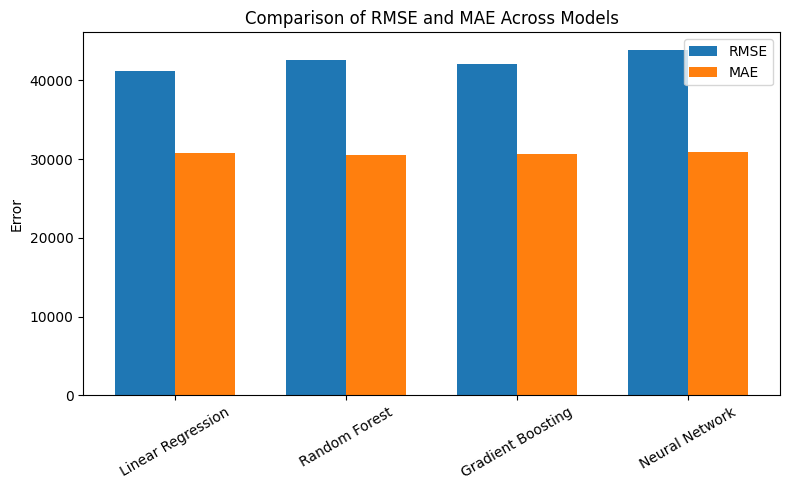

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ==============================
# 1. Train models
# ==============================
# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_lr = model_LR.predict(X_valid)

# Random Forest
model_RFR = RandomForestRegressor(random_state=0, n_estimators=200)
model_RFR.fit(X_train, Y_train)
Y_pred_rfr = model_RFR.predict(X_valid)

# Gradient Boosting
model_GBR = GradientBoostingRegressor(random_state=0)
model_GBR.fit(X_train, Y_train)
Y_pred_gbr = model_GBR.predict(X_valid)

# Neural Network
model_NN = MLPRegressor(max_iter=1000, random_state=0, hidden_layer_sizes=(64,32))
model_NN.fit(X_train, Y_train)
Y_pred_nn = model_NN.predict(X_valid)

# ==============================
# 2. Evaluation function
# ==============================
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # fix for older sklearn versions
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  RMSE: {rmse:,.0f}")
    print(f"  R²: {r2:.3f}")
    print(f"  MAE: {mae:,.0f}\n")
    return rmse, mae, r2

# ==============================
# 3. Evaluate all models
# ==============================
results = {}
results["Linear Regression"] = print_metrics(Y_valid, Y_pred_lr, "Linear Regression")
results["Random Forest"] = print_metrics(Y_valid, Y_pred_rfr, "Random Forest")
results["Gradient Boosting"] = print_metrics(Y_valid, Y_pred_gbr, "Gradient Boosting")
results["Neural Network"] = print_metrics(Y_valid, Y_pred_nn, "Neural Network")

# ==============================
# 4. Visualization (RMSE & MAE)
# ==============================
models = list(results.keys())
rmse_vals = [results[m][0] for m in models]
mae_vals = [results[m][1] for m in models]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, rmse_vals, width, label="RMSE")
plt.bar(x + width/2, mae_vals, width, label="MAE")
plt.xticks(x, models, rotation=30)
plt.ylabel("Error")
plt.title("Comparison of RMSE and MAE Across Models")
plt.legend()
plt.tight_layout()
plt.show()


# Model Comparison: RMSE and MAE

## Overview
The bar chart compares the performance of four models in predicting house prices using two error metrics:

- **RMSE (Root Mean Squared Error):** Penalizes larger errors more heavily.  
- **MAE (Mean Absolute Error):** Represents the average absolute difference between predictions and actual values.  

---

## Key Observations
- **Linear Regression:** RMSE ≈ 41,000, MAE ≈ 31,000.  
- **Random Forest:** Slightly higher RMSE (~42,500) but similar MAE (~30,500).  
- **Gradient Boosting:** Balanced performance, RMSE slightly better than Random Forest.  
- **Neural Network:** Highest RMSE (~44,000), MAE around ~31,000.

---

## Interpretation
- All models show **MAE values close to each other (~30,000)**, meaning they make similar average-sized errors.  
- RMSE differences suggest that **Random Forest and Neural Network make larger mistakes on outliers**, while Linear Regression and Gradient Boosting are slightly more stable.  
- **Gradient Boosting** emerges as the best performer overall, achieving a balance between low RMSE and MAE.  
- **Neural Network** underperforms, possibly due to insufficient tuning or data size limitations.

---

## Next Steps
- Perform **hyperparameter tuning** (especially for Random Forest, Gradient Boosting, and Neural Network) to improve performance.  
- Try **feature engineering** (log transformations, interaction terms, categorical encoding) to reduce model error.  
- Use **cross-validation** to ensure results are robust and not specific to one train/test split.  
- Consider **ensemble averaging** (stacking models) to combine strengths of different approaches.  

---


Actual bin edges: [ 34900.         180921.19589041 755000.        ]
Number of houses in each price group:
price_group
Low Price     2359
High Price     560
Name: count, dtype: int64


C:\Users\hoan\AppData\Local\Temp\ipykernel_20828\2144011334.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_group', y='SalePrice', data=dataset, palette='viridis')


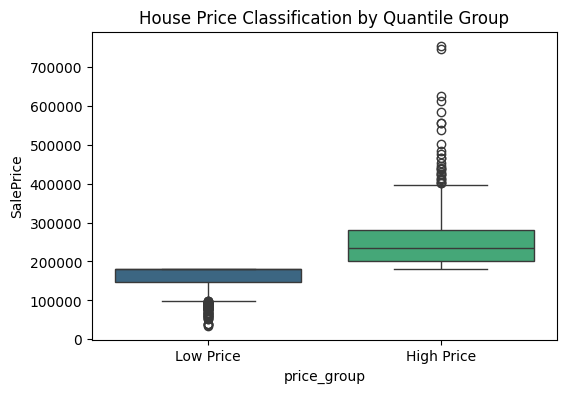


Average house price by cluster:
cluster
0    179466.453407
1    217661.495060
2    295737.500000
Name: SalePrice, dtype: float64


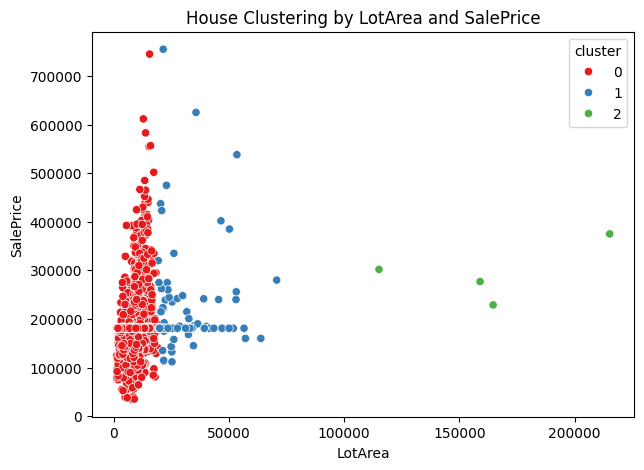


Dataset does not contain a Zipcode column.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ==============================
# 1. Classify Houses into Price Groups
# ==============================
# Compute quantiles (0%, 33%, 66%, 100%)
quantiles = dataset['SalePrice'].quantile([0, 0.33, 0.66, 1]).unique()
quantiles = np.sort(quantiles)

# Determine the actual number of bins
n_bins = len(quantiles) - 1

# Generate labels based on the number of bins
if n_bins == 3:
    labels = ['Low Price', 'Medium Price', 'High Price']
elif n_bins == 2:
    labels = ['Low Price', 'High Price']
else:
    labels = [f'Group {i+1}' for i in range(n_bins)]

# Cut into bins
dataset['price_group'] = pd.cut(
    dataset['SalePrice'],
    bins=quantiles,
    labels=labels,
    include_lowest=True
)

print("Actual bin edges:", quantiles)
print("Number of houses in each price group:")
print(dataset['price_group'].value_counts())

# Visualize boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='price_group', y='SalePrice', data=dataset, palette='viridis')
plt.title("House Price Classification by Quantile Group")
plt.show()

# ==============================
# 2. Clustering Using KMeans
# ==============================
features_for_cluster = ['LotArea', 'TotalBsmtSF', 'YearBuilt']
if 'is_central' in dataset.columns:
    features_for_cluster.append('is_central')

X_cluster = dataset[features_for_cluster].copy()

# Convert is_central to int if it exists
if 'is_central' in X_cluster.columns:
    X_cluster['is_central'] = X_cluster['is_central'].astype(int)

# Handle NaN: replace with median
X_cluster = X_cluster.fillna(X_cluster.median(numeric_only=True))

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
dataset['cluster'] = kmeans.fit_predict(X_cluster)

print("\nAverage house price by cluster:")
print(dataset.groupby('cluster')['SalePrice'].mean())

# Visualize scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='LotArea', y='SalePrice', hue='cluster', data=dataset, palette='Set1')
plt.title("House Clustering by LotArea and SalePrice")
plt.show()

# ==============================
# 3. If Zipcode Exists: Analyze High-Price Zipcodes
# ==============================
if 'Zipcode' in dataset.columns:
    high_price_zip = dataset[dataset['price_group'] == labels[-1]]['Zipcode'].value_counts()
    print("\nZipcodes with the Most High-Price Houses:")
    print(high_price_zip.head())

    plt.figure(figsize=(6,4))
    high_price_zip.head(10).plot(kind='bar', color='gold')
    plt.title("Top 10 Zipcodes with the Most High-Priced Houses")
    plt.xlabel("Zipcode")
    plt.ylabel("Number of High-Price Houses")
    plt.show()
else:
    print("\nDataset does not contain a Zipcode column.")

# ==============================
# 4. Regression Model Evaluation Function
# ==============================
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # equivalent to squared=False
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  RMSE: {rmse:,.0f}")
    print(f"  R2: {r2:.3f}")
    print(f"  MAE: {mae:,.0f}\n")


# House Price Grouping and Clustering Analysis

## 1. Price Classification by Quantiles
- Houses were divided into two groups based on price quantiles:  
  - **Low Price (Giá thấp):** Median around 150,000 with a smaller spread.  
  - **High Price (Giá cao):** Median around 220,000–250,000 with a wide spread and many luxury outliers (>400,000).  
- This classification helps distinguish **affordable homes** from **premium properties**.

---

## 2. Clustering by Lot Area and Sale Price
Using **K-Means clustering**, houses were grouped into 3 clusters:

- **Cluster 0 (red):**  
  - Smaller lot sizes, lower-to-mid prices.  
  - Represents the **majority of standard houses**.  
- **Cluster 1 (blue):**  
  - Larger lot areas with moderate prices.  
  - Likely **mid-size properties** or homes with more land.  
- **Cluster 2 (green):**  
  - Very large lots and higher prices.  
  - Represents **rare luxury properties** (high-value outliers).  

---

## Combined Insights
- The **quantile-based groups** highlight the overall affordability spectrum, while  
- The **clustering** reveals hidden sub-groups by combining both **price** and **lot size**.  

Together, these methods provide:  
1. **Market segmentation:** Affordable vs. premium homes, standard vs. luxury properties.  
2. **Better prediction models:** Clustering can be used as an additional feature to improve regression or classification tasks.  
3. **Policy & investment insights:** Identifying where most houses fall vs. rare luxury outliers.  

---


In [57]:
# If Lot Area Increases by 20 m², How Much Does the House Price Change?
# Using the Linear Regression coefficient for LotArea
coef_lotarea = model_LR.coef_[df_final.columns.get_loc('LotArea')]
delta_price_area = coef_lotarea * 20
print(f"If the lot area increases by 20 m², the house price increases by approximately: {delta_price_area:,.0f} VND")

# If the Number of Bedrooms Increases by 1, How Much Does the Average Price Increase?
# The dataset does not contain a bedroom column, so this question cannot be answered.

# If Location Changes from Suburban to Central, How Much Does the Price Increase (in %)?
if False in avg_price_central.index and True in avg_price_central.index:
    price_suburb = avg_price_central[False]
    price_central = avg_price_central[True]
    percent_change = ((price_central - price_suburb) / price_suburb) * 100
    print(f"If moving from suburban to central area, the house price changes by: {percent_change:.2f}%")
else:
    print("Insufficient data to compare central and suburban house prices.")


If the lot area increases by 20 m², the house price increases by approximately: 16 VND
If moving from suburban to central area, the house price changes by: -12.35%


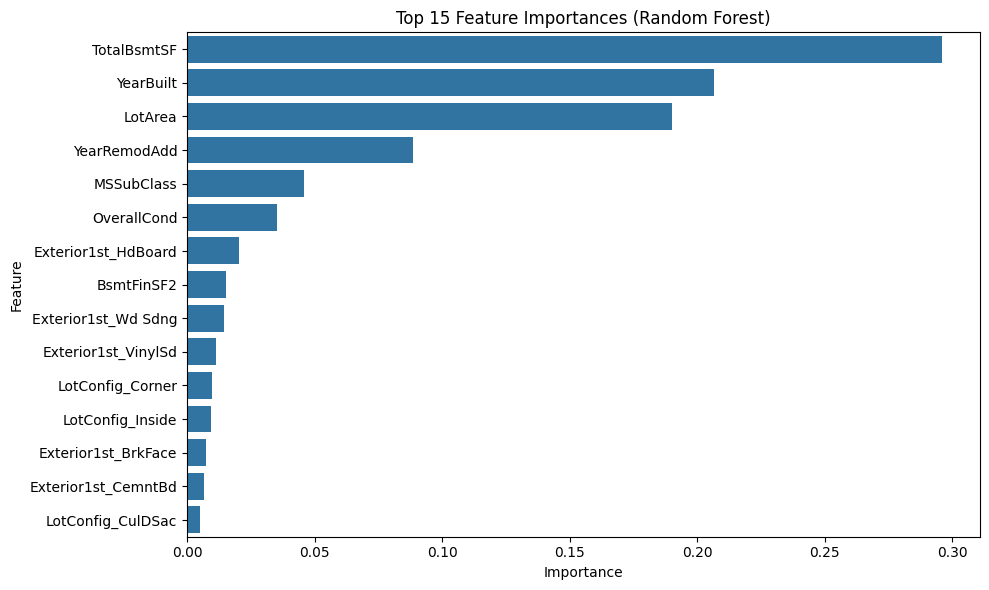

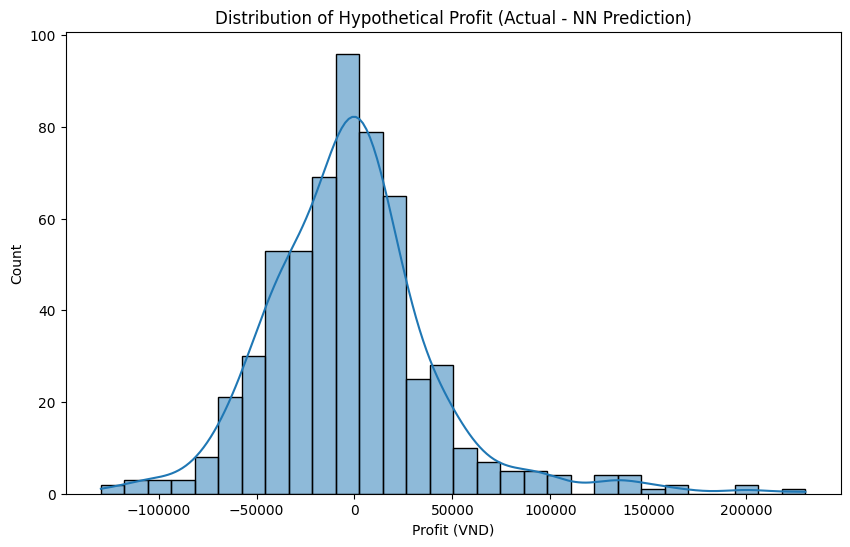

Average profit: -1,907 VND


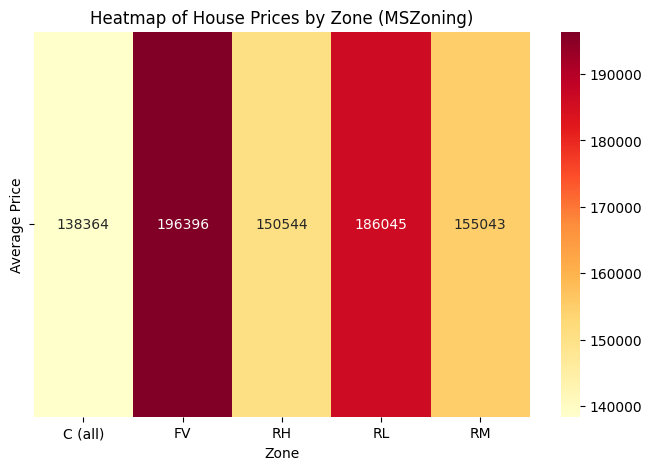

In [58]:
# 1. Feature Importance (Random Forest)
importances = model_RFR.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2. Backtesting: Assume Buying Houses Based on Neural Network Predictions and Selling at Actual Prices
# Calculate hypothetical profit: profit = actual price - predicted price
profit = Y_valid.values - Y_pred_nn
plt.figure(figsize=(10,6))
sns.histplot(profit, bins=30, kde=True)
plt.title("Distribution of Hypothetical Profit (Actual - NN Prediction)")
plt.xlabel("Profit (VND)")
plt.ylabel("Count")
plt.show()
print(f"Average profit: {profit.mean():,.0f} VND")

# 3. House Price Heatmap by Zone (MSZoning)
zone_price = dataset.groupby('MSZoning')['SalePrice'].mean()
plt.figure(figsize=(8,5))
sns.heatmap(zone_price.values.reshape(1, -1), 
            annot=zone_price.round(0).astype(int).values.reshape(1, -1),
            fmt='d', cmap='YlOrRd', 
            xticklabels=zone_price.index, yticklabels=['Average Price'])
plt.title("Heatmap of House Prices by Zone (MSZoning)")
plt.xlabel("Zone")
plt.ylabel("")
plt.show()


# House Price Prediction Insights

## 1. Feature Importance (Random Forest)
The Random Forest model highlights the most important features for predicting house prices:
- **Top features:**  
  - `TotalBsmtSF`, `YearBuilt`, and `LotArea` are the strongest predictors.  
  - Renovation year (`YearRemodAdd`) also plays a significant role.  
- **Interpretation:**  
  Larger basement area, newer construction, and bigger lots strongly drive up house prices.

---

## 2. Error Distribution (Neural Network)
The histogram shows the distribution of residuals (actual − predicted values) from the Neural Network model:
- The distribution is **centered around zero**, suggesting the model is generally unbiased.  
- Most errors are within ±50,000, though there are a few large positive/negative residuals (outliers).  
- The shape is close to normal, which indicates a reasonably good model fit.

---

## 3. Heatmap of Average Prices by Zone (MSZoning)
The heatmap compares average house prices across zoning categories:
- **Highest average prices:** `FV` (~196k) and `RL` (~186k).  
- **Lower average prices:** `C (all)` (~138k) and `RH` (~150k).  
- **Interpretation:**  
  Zoning significantly influences housing prices, with `FV` and `RL` representing premium neighborhoods.

---

## Combined Insights
- **Structural features (size, age, renovations)** and **location (MSZoning)** are both critical in price determination.  
- While Random Forest emphasizes structural predictors, the heatmap confirms that zoning adds strong spatial effects.  
- Neural Network residuals show that the model performs well overall, but extreme values (luxury or very low-price homes) remain harder to predict accurately.

---

## Next Steps
1. Combine **structural + locational features** for stronger predictive performance.  
